In [32]:
# Dependendies and setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Accessing data files
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"
#Reading files
city_data_df = pd.read_csv(city_data)
#print(city_data_df.columns)  
#comenting out after columns were listed
ride_data_df = pd.read_csv(ride_data)
#print(ride_data_df.columns)  
#comenting out after columns were listed and the comun colum is identified
  
#Merge dataframes into one by city
merged_df = pd.merge(city_data_df, ride_data_df, on="city", how="outer")
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [42]:
#Calculations needed:
    #Average Fare ($) Per City, Total Number of Rides Per City, Total Number of Drivers Per City
    # and City Type (Urban, Suburban, Rural)

df1 = merged_df.groupby(["city", "type"], as_index=False).agg({"fare":["sum","mean", "count"], "driver_count":"mean"})
df1.columns = df1.columns.map(" ".join)

df1.rename(columns = {"city ":"city", "type ": "city type","fare sum":"total fare", 
                      "fare mean":"avg fare", "fare count":"no. rides", 
                      "driver_count mean": "drivers"}, inplace=True)


df1.head(5)

,city,city type,total fare,avg fare,no. rides,drivers
0,Amandaburgh,Urban,443.55,24.641667,18,12
1,Barajasview,Urban,557.31,25.332273,22,26
2,Barronchester,Suburban,582.76,36.422500,16,11
3,Bethanyland,Suburban,593.21,32.956111,18,22
4,Bradshawfurt,Rural,400.64,40.064000,10,7


In [34]:
df1.columns

Index(['city', 'city type', 'total fare', 'avg fare', 'no. rides', 'drivers'], dtype='object')

In [43]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
urban = merged_df.loc[merged_df["type"]=="Urban",:]
urban.head(5)
urban_df = urban.groupby(["city"], as_index=False).agg({"fare":["mean", "count"], "driver_count":"mean"})
urban_df.columns = urban_df.columns.map(" ".join)
urban_df.rename(columns = {"fare mean": "avg fare", "fare count":"no. rides", "driver_count mean": "drivers"}, inplace=True)

urban_df.head(5)

,city,avg fare,no. rides,drivers
0,Amandaburgh,24.641667,18,12
1,Barajasview,25.332273,22,26
2,Carriemouth,28.314444,27,52
3,Christopherfurt,24.501852,27,41
4,Deanville,25.842632,19,49


In [44]:
suburban = merged_df.loc[merged_df["type"]=="Suburban",:]
suburban.head(5)
suburban_df = suburban.groupby(["city"], as_index=False).agg({"fare":["mean", "count"], "driver_count":"mean"})
suburban_df.columns = suburban_df.columns.map(" ".join)
suburban_df.rename(columns = {"fare mean": "avg fare", "fare count":"no. rides", "driver_count mean": "drivers"}, inplace=True)

suburban_df.head(5)

,city,avg fare,no. rides,drivers
0,Barronchester,36.422500,16,11
1,Bethanyland,32.956111,18,22
2,Brandonfort,35.437368,19,10
3,Colemanland,30.894545,22,23
4,Davidfurt,31.995882,17,23


In [45]:
rural = merged_df.loc[merged_df["type"]=="Rural",:]
rural.head(5)
rural_df = rural.groupby(["city"], as_index=False).agg({"fare":["mean", "count"], "driver_count":"mean"})
rural_df.columns = rural_df.columns.map(" ".join)
rural_df.rename(columns = {"fare mean": "avg fare", "fare count":"no. rides", "driver_count mean": "drivers"}, inplace=True)

rural_df.head(5)

,city,avg fare,no. rides,drivers
0,Bradshawfurt,40.064000,10,7
1,Garzaport,24.123333,3,7
2,Harringtonfort,33.470000,6,4
3,Jessicaport,36.013333,6,1
4,Lake Jamie,34.358333,6,4


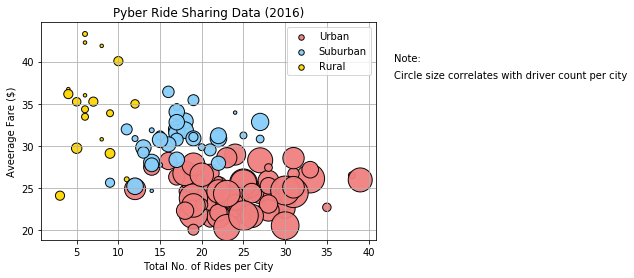

In [46]:
x_urban = urban_df["no. rides"]
y_urban = urban_df["avg fare"]
z_urban = urban_df["drivers"]
urban = plt.scatter(x_urban, y_urban, s=(z_urban*12), marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.95)

x_suburban = suburban_df["no. rides"]
y_suburban = suburban_df["avg fare"]
z_suburban = suburban_df["drivers"]
suburban = plt.scatter(x_suburban, y_suburban, s=(z_suburban*12), marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.95)

x_axis = rural_df["no. rides"]
y_rural = rural_df["avg fare"]
z = rural_df["drivers"]
rural = plt.scatter(x_axis, y_rural, s=(z*12), marker="o", facecolors="gold", edgecolors="black", alpha=0.95)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total No. of Rides per City")
plt.ylabel("Aveerage Fare ($)")

lgnd = plt.legend((urban, suburban, rural), ("Urban", "Suburban", "Rural"), scatterpoints=1, loc="best", fancybox=True)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.grid()
plt.text(43, 40, "Note:")
plt.text(43, 38, "Circle size correlates with driver count per city")
plt.show()

In [47]:
plt.savefig("Bubble_plot.png")

<Figure size 432x288 with 0 Axes>

In [48]:
df2 = df1.groupby("city type", as_index=False).agg({"total fare": "sum", "no. rides":"sum", "drivers":"sum"})
df2.head()

,city type,total fare,no. rides,drivers
0,Rural,4327.93,125,78
1,Suburban,19356.33,625,490
2,Urban,39854.38,1625,2405


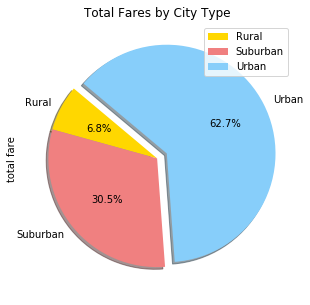

In [51]:
# Labels for the sections of pie chart
labels = df2["city type"]

# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]
# Tells matplotlib to seperate the largest section from the others
explode = (0, 0, 0.1)
# Creating the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart

plot = df2.plot.pie(y="total fare", explode=explode, labels=labels, autopct="%1.1f%%", figsize=(5,5), shadow=True, 
                   colors=colors, startangle=140)
plt.title("Total Fares by City Type")
plt.show()

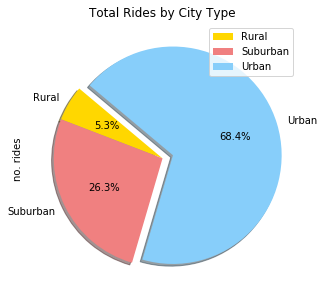

In [49]:
#Building the pie chart for the total rides by city type
plot = df2.plot.pie(y="no. rides", explode=explode, labels=labels, autopct="%1.1f%%", figsize=(5,5), shadow=True, 
                   colors=colors, startangle=140)
plt.title("Total Rides by City Type")
plt.show()

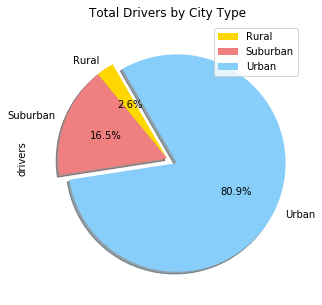

In [50]:
#Building the pie chart for the total drivers by city type
plot = df2.plot.pie(y="drivers", explode=explode, labels=labels, autopct="%1.1f%%", figsize=(5,5), shadow=True, 
                   colors=colors, startangle=120)
plt.title("Total Drivers by City Type")
plt.show()